<div class='alert alert-success'>
    <h2 align="center"> Color contour of T(t) and V(t) of virtual sensors along a line </h2>
</div>

Here, I present primary results for a case with $Ra= 10^7, \Gamma=0.5$ and $Pr=0.033$. In this part of study, we set about 800 probes at 5-different heights $H_{0,1,..,4}=0.0104956H, 0.251136H, 0.5H, 0.748864H$ and $0.989504H$. There are 40 probes along a line. The angle between each line in 45 degree. The sketch is shown in sketch figure. 


The history file contains the virtual sensor positions (800 virtual sensor i.e 800 rows) and $u, v, w, Pressure, temperature$ resectively. 


We measure all $u, v, w, P, T$ this quantities in dimensionless time $t/t_f$. we want to plot for example $T(t)$ and $v(t)$ at each angle for all 40 sensor along that line. 



 <img src='sketch.png' width='55%'/>

In [32]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
total_points = 800       #total points from the history point
probe_per_line = 40      #probe per line
first_point_probe = 360  #python starts from 0 so prob start from 0 tp 799, give the first probe number to +40

In [20]:
filename = "cyl_Ra07_4.his"

In [21]:
data_cordi = pd.read_table(filename, sep=r"\s+",  skiprows=1, nrows=total_points, header=None)
data_cordi = np.array(data_cordi)

Here I am extracting the cordinates from the file itself from the exact same position as probes are

In [22]:
x_n = data_cordi[first_point_probe:first_point_probe+probe_per_line,0]
y_n = data_cordi[first_point_probe:first_point_probe+probe_per_line,1]
z_n = data_cordi[first_point_probe:first_point_probe+probe_per_line,2]

As it is tube radius, r = $\sqrt{(x^2+y^2)}$

In [23]:
norm_x = np.sqrt(x_n**2+y_n**2)

BUT, we have probe point on diameter (instead of radius), so converting half of the point to negative

In [24]:
norm_x = np.concatenate((np.negative(norm_x[:int(probe_per_line/2)]), norm_x[int(probe_per_line/2):]) )

This history file contains 6 colomns of data
 0  , 1, 2, 3, 4, 5  are time, U, V, W, Pres,Temp respectively.
The first 801 line has the coordinate of the virtual sensors

In [25]:
data = np.loadtxt(filename, skiprows = total_points+1, usecols = (0,3,5))
time_steps = int(data.shape[0]/total_points)

Filter data

In [26]:
time_filtered_probe1 = np.zeros([probe_per_line,time_steps])
vel_filtered_probe1 = np.zeros([probe_per_line,time_steps])
temp_filtered_probe1 = np.zeros([probe_per_line,time_steps])


for i in range (0, time_steps):
    time_filtered_probe1[:,i] = data[(first_point_probe+i*total_points):(first_point_probe+probe_per_line+i*total_points),0]
    vel_filtered_probe1[:,i] = data[(first_point_probe+i*total_points):(first_point_probe+probe_per_line+i*total_points),1]
    temp_filtered_probe1[:,i] = data[(first_point_probe+i*total_points):(first_point_probe+probe_per_line+i*total_points),2]

In [27]:
# check the calculation of time step  
print(time_filtered_probe1[:,1])
print("----------------------------------------------------------")
print(time_filtered_probe1[:,2])

[948.1177 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177
 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177
 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177
 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177
 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177 948.1177]
----------------------------------------------------------
[948.11866 948.11866 948.11866 948.11866 948.11866 948.11866 948.11866
 948.11866 948.11866 948.11866 948.11866 948.11866 948.11866 948.11866
 948.11866 948.11866 948.11866 948.11866 948.11866 948.11866 948.11866
 948.11866 948.11866 948.11866 948.11866 948.11866 948.11866 948.11866
 948.11866 948.11866 948.11866 948.11866 948.11866 948.11866 948.11866
 948.11866 948.11866 948.11866 948.11866 948.11866]


In [28]:
# Extract time for time-grid, with time step
t = np.unique(time_filtered_probe1)

In [29]:
#%% Temp contours in Xt grid for a given y (at midplane)   
xt, tt = np.meshgrid(norm_x, t)
tt = tt - tt[0]   #initialize time

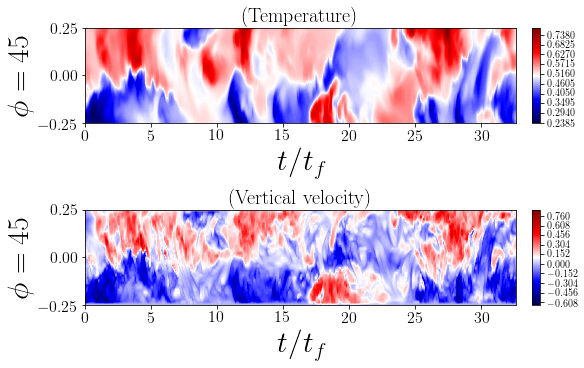

In [30]:
cmap = "seismic"
plt.rc('font', family='Times New Roman')
plt.rc('text', usetex=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig, axs = plt.subplots(nrows=2, ncols=1, sharey=False, figsize=(8, 5))

cset1=axs[0].contourf(tt, xt, temp_filtered_probe1.T, levels = 500, cmap=cmap)
axs[0].set_title('(Temperature)', fontsize=20)
axs[0].tick_params(labelsize=16)
axs[0].set_xlabel('$t/t_{f}$',fontsize=30)
axs[0].set_ylabel('$\phi= 45 $',fontsize=30)
fig.colorbar(cset1, ax=axs[0])


cset2=axs[1].contourf(tt, xt, vel_filtered_probe1.T, levels = 500, cmap=cmap)
axs[1].set_title('(Vertical velocity)', fontsize=20)
axs[1].tick_params(labelsize=16)
axs[1].set_xlabel('$t/t_{f}$',fontsize=30)
axs[1].set_ylabel('$\phi= 45 $',fontsize=30)
fig.colorbar(cset2, ax=axs[1])


fig.savefig("contour_hight_angle.png", bbox_inches='tight')

One can also plot at different height and $\phi$, as it is shown here at height $H_1$.

 <img src='Figure_10.png' width='55%'/>